In [1]:
include("preamble.jl")

@pyimport sklearn

@pyimport2 sklearn: (linear_model, decomposition, datasets, pipeline)
@pyimport2 sklearn.grid_search: GridSearchCV

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:38
 in find_in_path at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:11
 in find_file at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:40
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:50
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 5


PyObject <class 'sklearn.grid_search.GridSearchCV'>

 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:694
 in require at no file:0
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:87
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 5


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1601: DeprecationWarning: check_cv will return indices instead of boolean masks from 0.17
  'masks from 0.17', DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:69: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


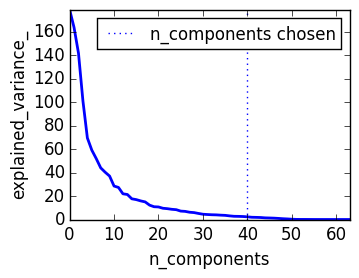

PyObject <matplotlib.legend.Legend object at 0x316393610>

In [4]:
# Original Python Code source: Gaël Varoquaux
# License: BSD 3 clause

logistic = Sklearn.LinearModels.LogisticRegression()

pca = decomposition.PCA()
pipe = Sklearn.Pipeline([("pca", pca), ("logistic", logistic)])

digits = datasets.load_digits()
X_digits = digits["data"]
y_digits = digits["target"]

###############################################################################
# Plot the PCA spectrum
fit!(pca, X_digits)

figure(1, figsize=(4, 3))
clf()
axes([.2, .2, .7, .7])
plot(pca[:explained_variance_], linewidth=2)
axis("tight")
xlabel("n_components")
ylabel("explained_variance_")

###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = Sklearn.GridSearchCV(pipe,
                         Dict("pca__n_components"=>n_components,
                              "logistic__C"=>Cs))
fit!(estimator, X_digits, y_digits)

#@show estimator.best_estimator_[:named_steps]["pca"][:n_components]
#@show jl_estimator.best_estimator_[:named_steps]["pca"][:n_components]

axvline(Sklearn.named_steps(estimator.best_estimator_)["pca"][:n_components],
            linestyle=":", label="n_components chosen")
legend(prop=Dict("size"=>12))